Data preprocessing

1.Importing neccessary libraries

In [6]:
# Libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

import dataset

In [7]:
data = pd.read_csv("WeatherAUS.csv")

In [8]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [9]:
data.describe()#gives description statistics of the data

MinTemp       MaxTemp      Rainfall  Evaporation     Sunshine  \
count  21245.000000  21365.000000  21191.000000  7314.000000  4670.000000   
mean      12.988957     24.247994      2.632901     6.183429     8.187687   
std        5.994991      6.341208      9.776620     5.319547     3.748941   
min       -3.300000      6.800000      0.000000     0.000000     0.000000   
25%        8.400000     19.400000      0.000000     3.000000     6.000000   
50%       13.400000     23.800000      0.000000     5.000000     9.400000   
75%       17.900000     28.300000      0.600000     8.000000    10.900000   
max       29.700000     47.300000    371.000000    86.200000    14.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   18011.000000  20982.000000  20303.000000  21201.000000  20507.000000   
mean       37.569097     12.270899     16.521549     69.196547     51.104989   
std        13.115992      9.015977      9.182935     18.127072     21.417623   
min         7.000000      0.000000      0.000000      3.000000      1.000000   
25%        28.000000      6.000000      9.000000     57.000000     34.000000   
50%        35.000000     11.000000     15.000000     70.000000     51.000000   
75%        44.000000     19.000000     22.000000     83.000000     67.000000   
max       135.000000    130.000000     83.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  18103.000000  18107.000000  11955.000000  11643.000000  21344.000000   
mean    1018.240673   1015.581444      4.102551      4.323800     17.858630   
std        6.584312      6.512586      3.039370      2.761263      5.597294   
min      980.500000    979.000000      0.000000      0.000000      0.300000   
25%     1013.800000   1011.100000      1.000000      1.000000     13.800000   
50%     1018.300000   1015.600000      4.000000      5.000000     18.300000   
75%     1022.700000   1020.000000      7.000000      7.000000     22.000000   
max     1039.900000   1036.800000      8.000000      8.000000     37.700000   

            Temp3pm  
count  20655.000000  
mean      22.752171  
std        6.177603  
min        6.400000  
25%       18.100000  
50%       22.200000  
75%       26.600000  
max       46.700000

In [10]:
data.info()#gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21692 entries, 0 to 21691
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21692 non-null  object 
 1   Location       21692 non-null  object 
 2   MinTemp        21245 non-null  float64
 3   MaxTemp        21365 non-null  float64
 4   Rainfall       21191 non-null  float64
 5   Evaporation    7314 non-null   float64
 6   Sunshine       4670 non-null   float64
 7   WindGustDir    18009 non-null  object 
 8   WindGustSpeed  18011 non-null  float64
 9   WindDir9am     18712 non-null  object 
 10  WindDir3pm     19820 non-null  object 
 11  WindSpeed9am   20982 non-null  float64
 12  WindSpeed3pm   20303 non-null  float64
 13  Humidity9am    21201 non-null  float64
 14  Humidity3pm    20507 non-null  float64
 15  Pressure9am    18103 non-null  float64
 16  Pressure3pm    18107 non-null  float64
 17  Cloud9am       11955 non-null  float64
 18  Cloud3

In [11]:
data.shape #gives the dimensions of the data

(21692, 23)

handling missing values

In [12]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            447
MaxTemp            327
Rainfall           501
Evaporation      14378
Sunshine         17022
WindGustDir       3683
WindGustSpeed     3681
WindDir9am        2980
WindDir3pm        1872
WindSpeed9am       710
WindSpeed3pm      1389
Humidity9am        491
Humidity3pm       1185
Pressure9am       3589
Pressure3pm       3585
Cloud9am          9737
Cloud3pm         10049
Temp9am            348
Temp3pm           1037
RainToday          502
RainTomorrow       488
dtype: int64

Missing matrix

In [13]:
import missingno as msno

<Axes: >

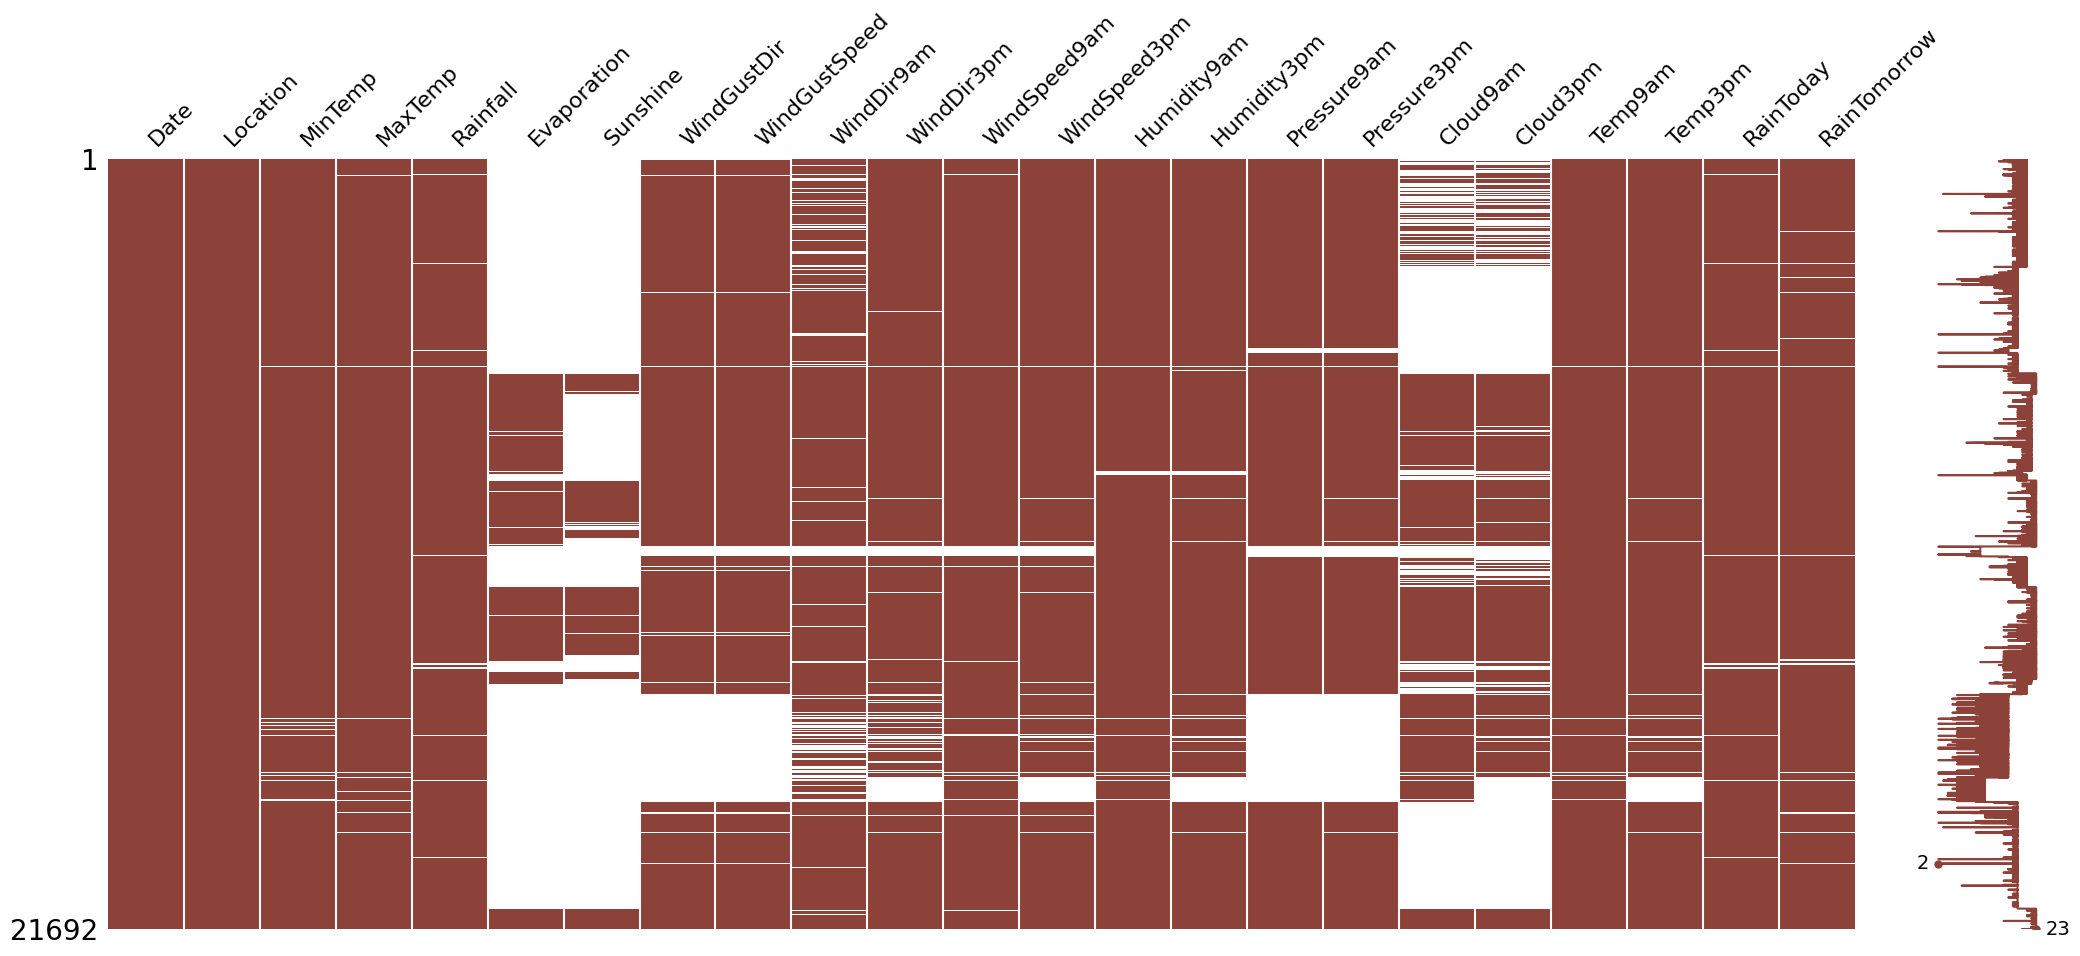

In [14]:
msno.matrix(data,color=(0.55,0.255,0.225),fontsize=16)

Imputing data using the Imputation method in sklearn.Simpleimputer

In [15]:
# removing columns with more than 20% missing values and segregatting cat and num variables
data_cat= data[['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']]
data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis  = 1 , inplace=True)
data.drop(columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1,inplace=True)

To check the current columns in the DataFrame after dropping some:

In [16]:
print(data.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow'],
      dtype='object')


In [19]:
# removing columns with more than 20% missing values and segregatting cat and num variables

# Define columns to segregate into data_cat
cols_for_data_cat = ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
# Filter for columns that actually exist in the DataFrame
existing_cols_for_data_cat = [col for col in cols_for_data_cat if col in data.columns]

# If there are columns to segregate, create data_cat from them
if existing_cols_for_data_cat:
    data_cat = data[existing_cols_for_data_cat].copy()
    # Then drop these columns from the main 'data' DataFrame if they still exist
    data.drop(columns=existing_cols_for_data_cat, axis=1, inplace=True, errors='ignore')
else:
    # If no such columns exist, it means they were already processed.
    # data_cat should be available from a prior execution if all columns are gone.
    pass

# Drop columns with more than 20% missing values (e.g., 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm')
# Use errors='ignore' to prevent KeyError if columns are already dropped
cols_to_drop_high_nan = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
data.drop(columns=cols_to_drop_high_nan, axis=1, inplace=True, errors='ignore')


In [20]:
# filling the missing data of numeric variables with mean
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [21]:
cat_names =data_cat.columns

In [22]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [23]:
data_cat =imp_mode.fit_transform(data_cat)

In [24]:
data_cat=pd.DataFrame(data_cat,columns=cat_names)

In [25]:
data=pd.concat([data,data_cat],axis=1)

Data visualization


In [26]:
data.corr(numeric_only=True)

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.706642  0.101262       0.347234      0.265878   
MaxTemp        0.706642  1.000000 -0.091584       0.212499      0.103093   
Rainfall       0.101262 -0.091584  1.000000       0.134603      0.115155   
WindGustSpeed  0.347234  0.212499  0.134603       1.000000      0.466051   
WindSpeed9am   0.265878  0.103093  0.115155       0.466051      1.000000   
WindSpeed3pm   0.206218  0.054107  0.068274       0.586249      0.434157   
Humidity9am   -0.128432 -0.432191  0.237210      -0.186574     -0.297918   
Humidity3pm    0.111600 -0.445379  0.249657       0.020087     -0.049474   
Pressure9am   -0.446729 -0.371134 -0.094647      -0.427543     -0.156579   
Pressure3pm   -0.423481 -0.432995 -0.058597      -0.399009     -0.119164   
Temp9am        0.892857  0.860042 -0.001473       0.322013      0.232767   
Temp3pm        0.664094  0.964937 -0.092752       0.170445      0.096869   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.206218    -0.128432     0.111600    -0.446729   
MaxTemp            0.054107    -0.432191    -0.445379    -0.371134   
Rainfall           0.068274     0.237210     0.249657    -0.094647   
WindGustSpeed      0.586249    -0.186574     0.020087    -0.427543   
WindSpeed9am       0.434157    -0.297918    -0.049474    -0.156579   
WindSpeed3pm       1.000000    -0.127138     0.072875    -0.235652   
Humidity9am       -0.127138     1.000000     0.667314     0.146844   
Humidity3pm        0.072875     0.667314     1.000000     0.042514   
Pressure9am       -0.235652     0.146844     0.042514     1.000000   
Pressure3pm       -0.198105     0.172335     0.109332     0.962752   
Temp9am            0.200574    -0.390495    -0.125621    -0.432413   
Temp3pm            0.025579    -0.433725    -0.514705    -0.339062   

               Pressure3pm   Temp9am   Temp3pm  
MinTemp          -0.423481  0.892857  0.664094  
MaxTemp          -0.432995  0.860042  0.964937  
Rainfall         -0.058597 -0.001473 -0.092752  
WindGustSpeed    -0.399009  0.322013  0.170445  
WindSpeed9am     -0.119164  0.232767  0.096869  
WindSpeed3pm     -0.198105  0.200574  0.025579  
Humidity9am       0.172335 -0.390495 -0.433725  
Humidity3pm       0.109332 -0.125621 -0.514705  
Pressure9am       0.962752 -0.432413 -0.339062  
Pressure3pm       1.000000 -0.442628 -0.408460  
Temp9am          -0.442628  1.000000  0.817214  
Temp3pm          -0.408460  0.817214  1.000000

In [27]:
cor=data.corr(numeric_only=True)

Heat map

<Axes: >

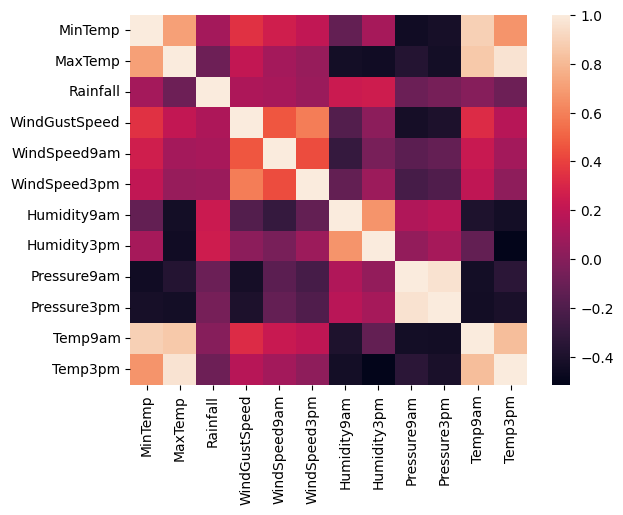

In [28]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

pair plot

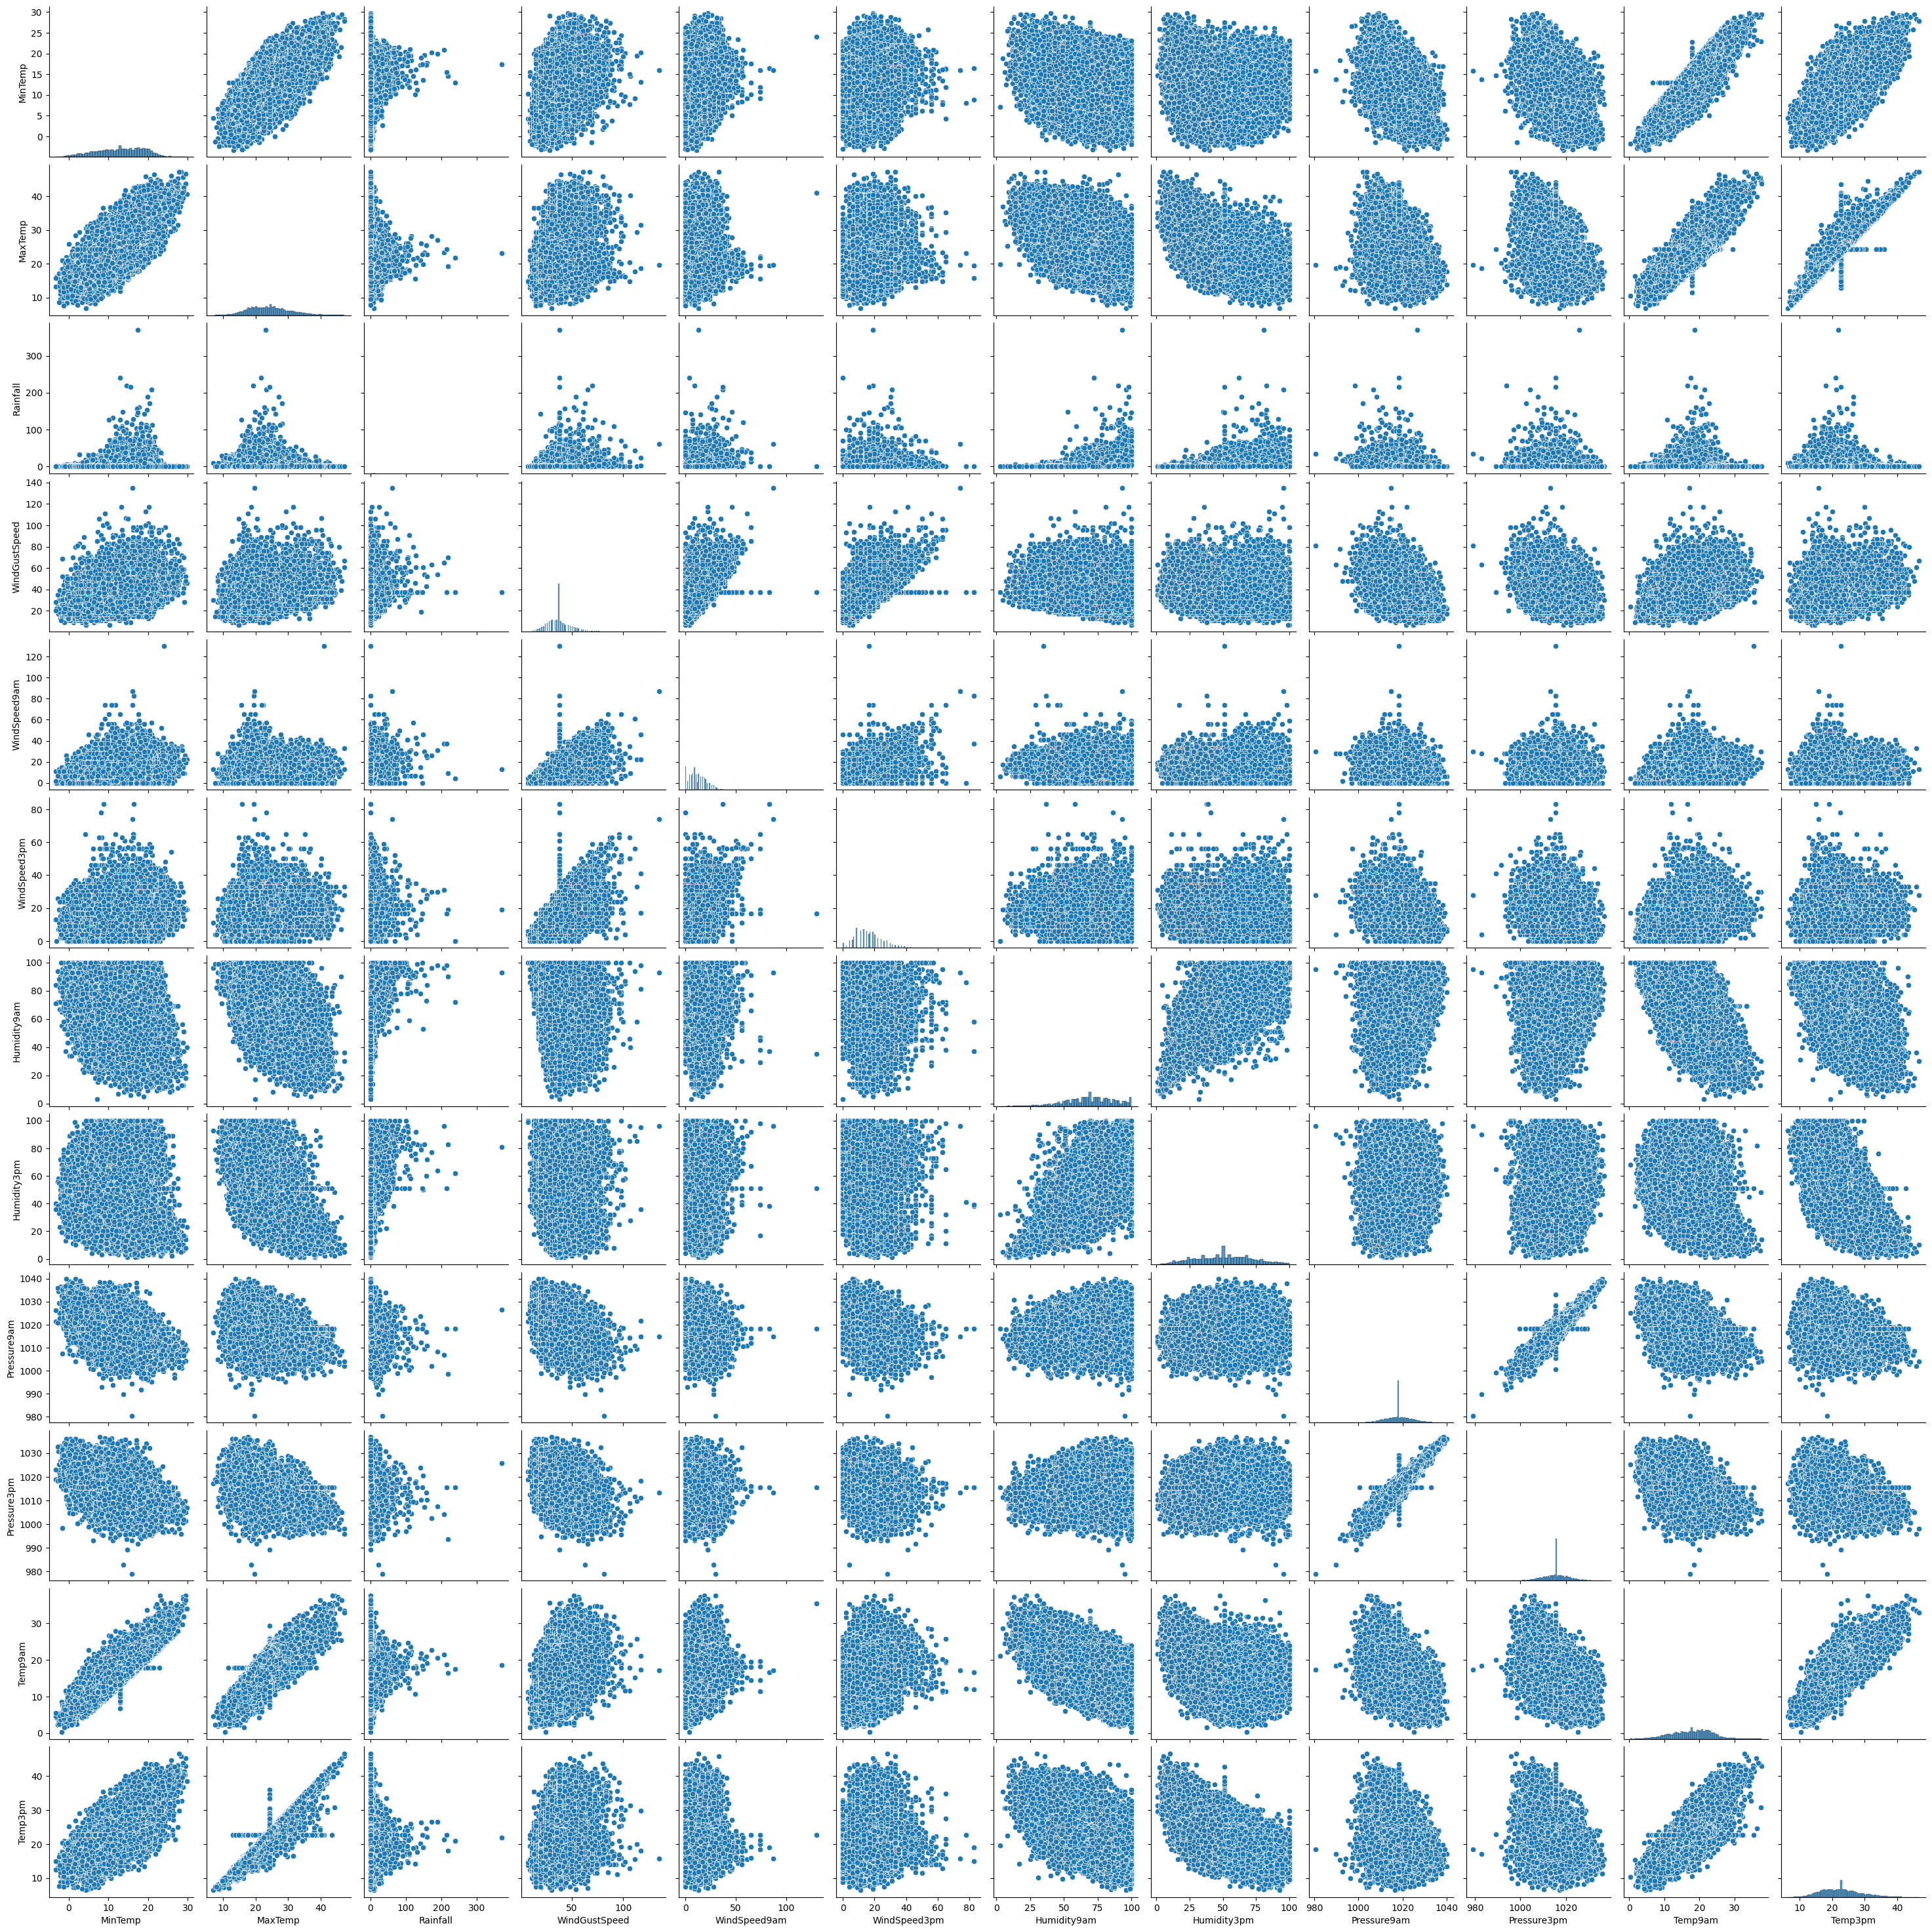

In [29]:
sns.pairplot(data.select_dtypes(include=np.number))

<Axes: >

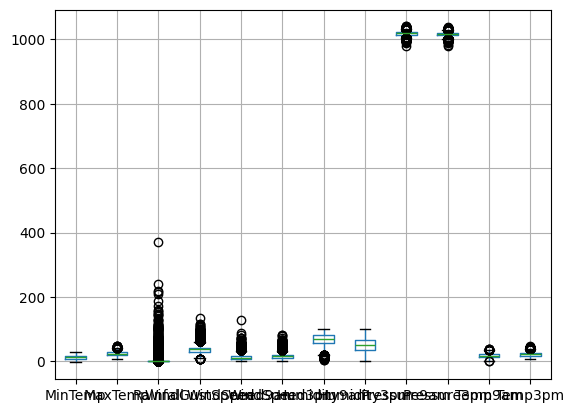

In [30]:
data.boxplot()

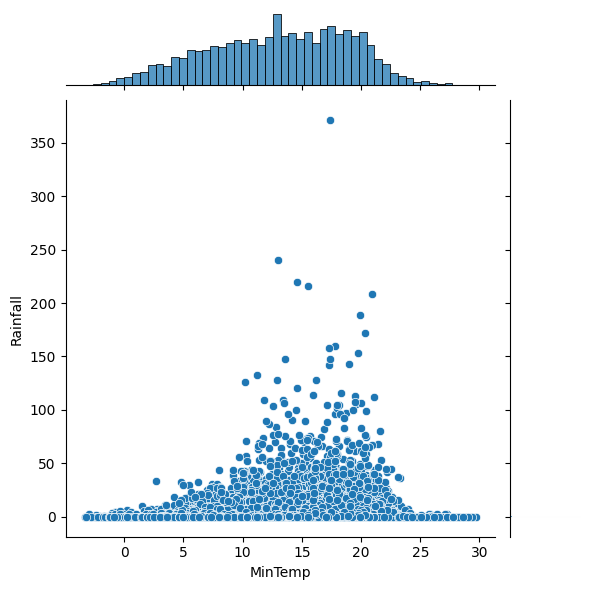

In [31]:
sns.jointplot(x=data["MinTemp"], y=data['Rainfall'])

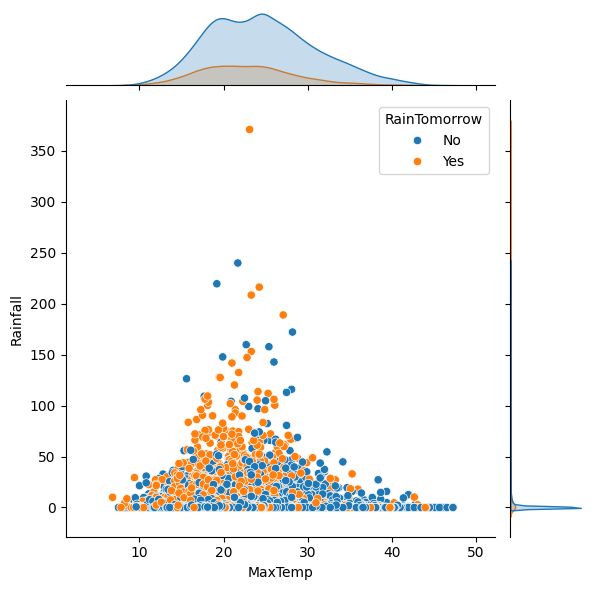

In [32]:
sns.jointplot(x=data["MaxTemp"], y=data['Rainfall'],hue=data['RainTomorrow'])

<Axes: xlabel='RainTomorrow', ylabel='Count'>

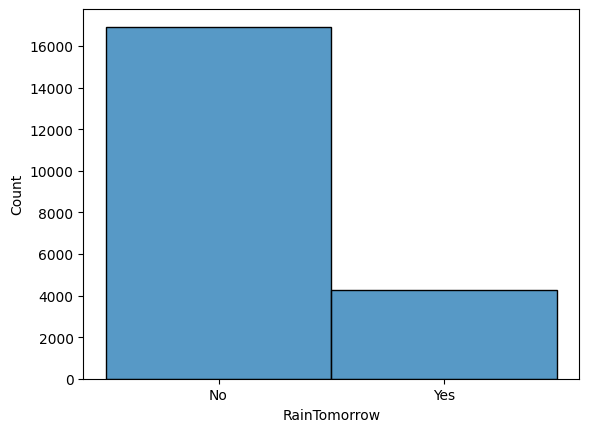

In [33]:
sns.histplot(data['RainTomorrow'])

<Axes: xlabel='MaxTemp', ylabel='Rainfall'>

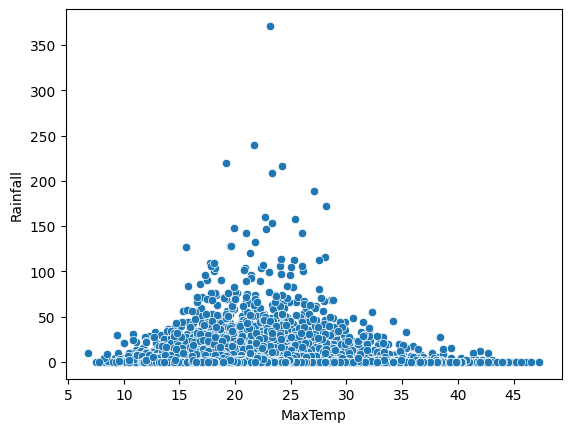

In [34]:
sns.scatterplot(x=data['MaxTemp'],y=data['Rainfall'])

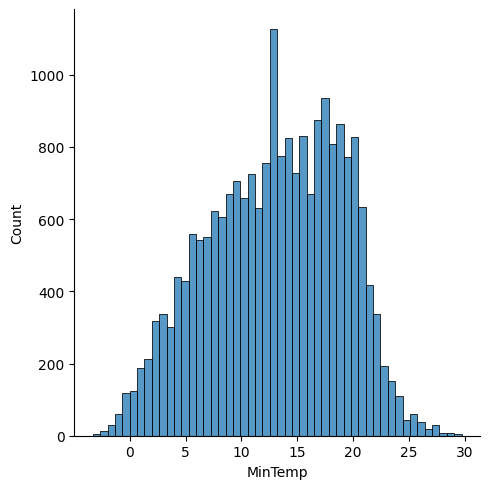

In [35]:
sns.displot(data['MinTemp'])

Splitting the Dateset into Dependent and Independent variable

In [36]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

Feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)
names=x.columns
names


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [38]:
sc=StandardScaler()
# Select only numerical columns for scaling
x_numeric = x.select_dtypes(include=np.number)
names = x_numeric.columns # Update names to reflect only numerical columns
x_scaled = sc.fit_transform(x_numeric)
x = pd.DataFrame(x_scaled, columns=names, index=x_numeric.index)

splitting data into training and testing

In [39]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

initilizing all model and predicting for better accuracy

In [40]:
from sklearn.svm import SVC # Explicitly import SVC class
import xgboost
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection, ensemble, linear_model, tree
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer # Needed for mode imputation

# Load the dataset to ensure 'data' is defined
data = pd.read_csv("WeatherAUS.csv")

# Re-apply data preprocessing steps to ensure 'x' and 'y' are correctly defined
# and avoid issues from previous failed cell executions or state inconsistencies.

# Create a fresh copy of data to apply transformations consistently
current_data = data.copy()

# Step 1: Drop columns with more than 20% missing values (Evaporation, Sunshine, Cloud9am, Cloud3pm)
columns_to_drop_high_nan = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
current_data.drop(columns=[col for col in columns_to_drop_high_nan if col in current_data.columns], axis=1, inplace=True)

# Step 2: Impute numerical variables with mean (from cell iYVuNwrEjoCg)
numerical_cols_for_mean_imputation = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Pressure3pm', 'Temp9am', 'Temp3pm'
]
for col in numerical_cols_for_mean_imputation:
    if col in current_data.columns:
        current_data[col] = current_data[col].fillna(current_data[col].mean())

# Step 3: Handle categorical variables (WindGustDir, WindDir9am, WindDir3pm, RainToday, Location, RainTomorrow)
# First, extract the target variable RainTomorrow
y = current_data['RainTomorrow']
current_data.drop('RainTomorrow', axis=1, inplace=True) # Drop from features DataFrame

# Impute categorical features with mode
categorical_features_for_imputation = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Location']
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for col in categorical_features_for_imputation:
    if col in current_data.columns:
        current_data[col] = imp_mode.fit_transform(current_data[[col]]).ravel()

# Drop 'Date' column as it's typically not used directly in models and not scaled
if 'Date' in current_data.columns:
    current_data.drop('Date', axis=1, inplace=True)

# Assign processed data to x before encoding remaining categorical features
x = current_data.copy()

# Encode all remaining categorical features in x
for col in x.select_dtypes(include='object').columns:
    le_feature = LabelEncoder()
    x[col] = le_feature.fit_transform(x[col])

# Feature scaling (from cell aLx8aC-Oq1Az)
sc = StandardScaler()
# Ensure all columns in x are numeric before scaling
x_scaled_array = sc.fit_transform(x.select_dtypes(include=np.number))
x = pd.DataFrame(x_scaled_array, columns=x.select_dtypes(include=np.number).columns, index=x.index)

# Splitting data into training and testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

# Encode target variable y (RainTomorrow) as it's categorical
le_y = LabelEncoder()
y_train_encoded = le_y.fit_transform(y_train)
y_test_encoded = le_y.transform(y_test)

# Models intilization of the models
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = ensemble.RandomForestClassifier()
svc_model = SVC()
Dtree = tree.DecisionTreeClassifier()
GBM = ensemble.GradientBoostingClassifier()
log = linear_model.LogisticRegression()

# fitting the model with already encoded labels
XGBoost.fit(x_train, y_train_encoded)
Rand_forest.fit(x_train, y_train_encoded)
svc_model.fit(x_train, y_train_encoded)
Dtree.fit(x_train, y_train_encoded)
GBM.fit(x_train, y_train_encoded)
log.fit(x_train, y_train_encoded)

LogisticRegression()

In [41]:
# predicting the train values
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = svc_model.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)

In [43]:

#checking the accuraccy score
print("xgboost:",metrics.accuracy_score(y_train_encoded,p1))
print("Rand_forest:", metrics.accuracy_score(y_train_encoded,p2))
print("svm:",metrics.accuracy_score(y_train_encoded,p3))
print("Dtree:", metrics.accuracy_score(y_train_encoded,p4))
print("GBM:", metrics.accuracy_score(y_train_encoded,p5))
print("log:", metrics.accuracy_score(y_train_encoded, p6))

xgboost: 0.833296095146432
Rand_forest: 0.9999140657225354
svm: 0.8413911040835969
Dtree: 0.9999226591502819
GBM: 0.8407551904303588
log: 0.8200536229891379


In [51]:
y_pred = XGBoost.predict(x_test)
y_pred_proba = XGBoost.predict_proba(x_test) # Get probability predictions
conf_matrix = metrics.confusion_matrix(y_test_encoded, y_pred)

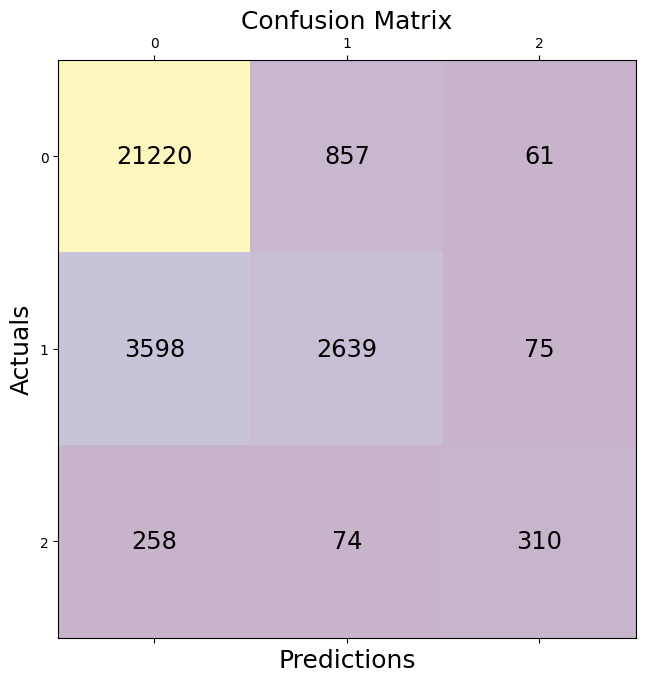

In [45]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, alpha= 0.3 )
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [46]:
from sklearn import metrics

# Calculate metrics using y_test_encoded and y_pred
Accuracy = metrics.accuracy_score(y_test_encoded, y_pred)
Precesion = metrics.precision_score(y_test_encoded, y_pred, average='weighted')
Recall = metrics.recall_score(y_test_encoded, y_pred, average='weighted')
F1_score = metrics.f1_score(y_test_encoded, y_pred, average='weighted')

print(conf_matrix)
print("Accuracy:", Accuracy)
print("Precesion:", Precesion)
print("Recall:", Recall)
print("F1-score:", F1_score)

[[21220   857    61]
 [ 3598  2639    75]
 [  258    74   310]]
Accuracy: 0.8307782208167194
Precesion: 0.8196736660656065
Recall: 0.8307782208167194
F1-score: 0.8124789140764411


In [47]:

print(conf_matrix)
print("Accuracy:", Accuracy)
print("Precesion:", Precesion)
print("Recall:", Recall)
print("F1-score:", F1_score)

[[21220   857    61]
 [ 3598  2639    75]
 [  258    74   310]]
Accuracy: 0.8307782208167194
Precesion: 0.8196736660656065
Recall: 0.8307782208167194
F1-score: 0.8124789140764411


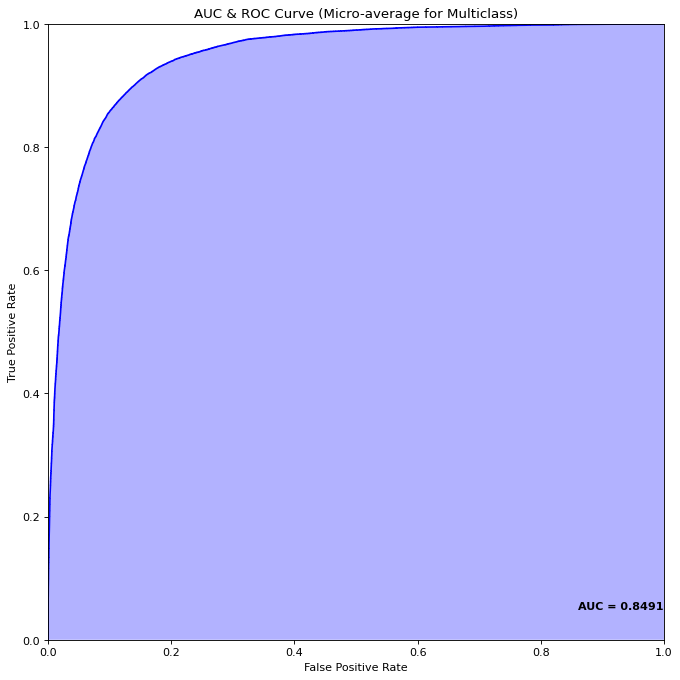

In [52]:
from sklearn.preprocessing import LabelBinarizer

# Calculate AUC score using probability predictions and multiclass parameters
auc = metrics.roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='weighted')

# For roc_curve in multiclass, we need to binarize the true labels
# and use the probability estimates for a micro-average ROC curve.
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_encoded)

# If y_test_binarized has only one column (binary case after binarization), ensure it's 2D for consistent handling
# This check is important if the target variable ends up having only two classes after LabelBinarizer
if y_test_binarized.shape[1] == 1:
    y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

# Calculate micro-average ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())

plt.figure(figsize=(12, 10), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve (Micro-average for Multiclass)")
plt.plot(fpr, tpr, 'b') # Using 'b' for a blue line
plt.fill_between(fpr, tpr, facecolor='blue', alpha=0.3) # Adjusted alpha for fill
plt.text(1, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=10, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [54]:
import pickle

In [56]:
pickle.dump(XGBoost,open('rainfall.pkl', 'wb')) # model
pickle.dump(le_y, open('encoder.pkl', 'wb')) #encoder saving
pickle.dump(imp_mode,open('impter.pkl', 'wb'))# imputer saving
pickle.dump(sc,open('scale.pkl','wb')) #scaling the data